# Clustering

Find clusters in the data using $k$-means algorithmn and hierarchical clustering (classes `KMeans` and `AgglomerativeClustering` in `sklearn.cluster`). Try to answer the following questions:
1. What is the best number of clusters?
2. What are the sizes of the clusters?
3. How can we visualize the result of clustering?
    * using PCA
    * plotting according to the geographical coordinates
4. Can normalization help to obtain better clustering?


In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
data = pd.read_csv('data/archive.zip')

In [75]:
data.sample(5)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
5023,Preston,140 Murray Rd,3,h,930000.0,SP,Love,28/08/2016,8.8,3072.0,...,1.0,2.0,679.0,143.0,1950.0,Darebin,-37.73920,145.01630,Northern Metropolitan,14577.0
7015,Hawthorn East,4 Temple St,6,h,1666000.0,S,Noel,24/09/2016,7.5,3123.0,...,2.0,0.0,350.0,198.0,1900.0,Boroondara,-37.82190,145.05560,Southern Metropolitan,6482.0
9446,Brighton,2/58 North Rd,3,u,1410000.0,S,Nick,17/06/2017,10.5,3186.0,...,2.0,2.0,257.0,NaN,NaN,Bayside,-37.89886,144.99462,Southern Metropolitan,10579.0
10931,Broadmeadows,38 Stanhope St,3,h,632000.0,S,Ray,12/08/2017,14.0,3047.0,...,1.0,4.0,697.0,100.0,1960.0,Hume,-37.68557,144.93156,Northern Metropolitan,4294.0
7720,Caulfield North,198 Hawthorn Rd,4,h,1700000.0,S,Marshall,20/05/2017,8.1,3161.0,...,2.0,2.0,644.0,NaN,NaN,Glen Eira,-37.87810,145.02350,Southern Metropolitan,6923.0


Before doing any analysis, we should correct missing and invalid data.

In [76]:
from sklearn.impute import SimpleImputer

imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
data['Car'] = imp_mean.fit_transform(data['Car'].to_numpy().reshape(-1,1))

In [77]:
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
data['Landsize'] = imp_median.fit_transform(data['Landsize'].to_numpy().reshape(-1,1))
data['BuildingArea'] = imp_median.fit_transform(data['BuildingArea'].to_numpy().reshape(-1,1))
data['YearBuilt'] = imp_median.fit_transform(data['YearBuilt'].to_numpy().reshape(-1,1))

One attribute contains still some undefined values. You can correct that but it not necessary for the further computations.

## k-Means Clustering

In [78]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=9)

X = data[['Rooms', 'Bedroom2', 'Bathroom', 'YearBuilt', 'Car', 'Lattitude', 'Longtitude', 
              'Distance', 'Postcode', 'BuildingArea', 'Propertycount', 'Landsize']]
y = data['Price']
print(f"{data.shape}")

km.fit(X)

print(f'Score {km.inertia_} for {len(km.cluster_centers_)} clusters')
# print(km.score(X))

(13580, 21)


c:\Users\hgand\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Score 17233979175.8675 for 9 clusters


## 1. What is the best number of clusters?

Compute the reconstruction error for $k=2,\ldots,20$.

In [79]:
# YOUR CODE HERE
def fit(data,numCentroids):
    km = KMeans(n_clusters= numCentroids)
    km.fit(data)
    return km.inertia_

errors = [fit(X,k) for k in range(2,21)]

c:\Users\hgand\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\hgand\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\hgand\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\hgand\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\hgand\anaconda3\Lib\site-packages\sklearn\clust

Minimum error:  4899672238.150559 at index  18


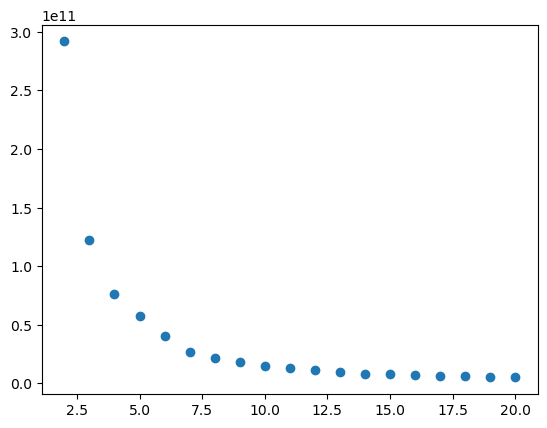

In [80]:
print("Minimum error: ",np.min(errors),"at index ",np.argmin(errors))
plt.scatter(range(2,21),errors)

## 2. What are the sizes of the clusters?
Plot histogram to show cluster sizes similar to
   
<img src=attachment:abf324f3-f84f-4b37-8d26-3609e1b9f430.png width=300>

{0: 3215, 1: 1928, 2: 1, 3: 1247, 4: 3687, 5: 8, 6: 358, 7: 3097, 8: 39}


(array([3.215e+03, 1.928e+03, 1.000e+00, 1.247e+03, 3.687e+03, 8.000e+00,
        3.580e+02, 3.097e+03, 3.900e+01]),
 array([0.        , 0.88888889, 1.77777778, 2.66666667, 3.55555556,
        4.44444444, 5.33333333, 6.22222222, 7.11111111, 8.        ]),
 <BarContainer object of 9 artists>)

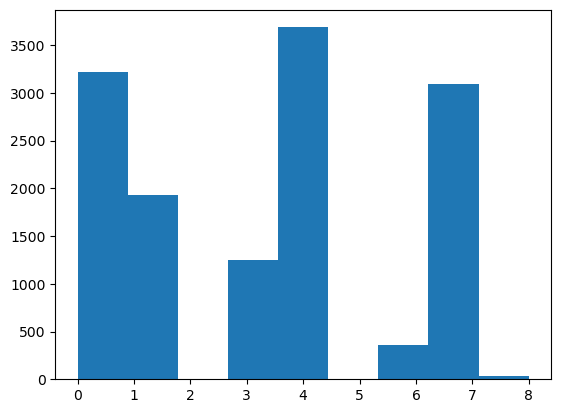

In [81]:
# plot hisgram of y_pred
predictions = km.predict(X)
unique,counts = np.unique(predictions,return_counts=True)
counts = dict(zip(unique,counts))
print(counts)
plt.hist(predictions,bins = 9)

## 3. How can we visualize the result of clustering?
### using PCA
* plot individual clusters using PCA
 print also the sizes of clusters


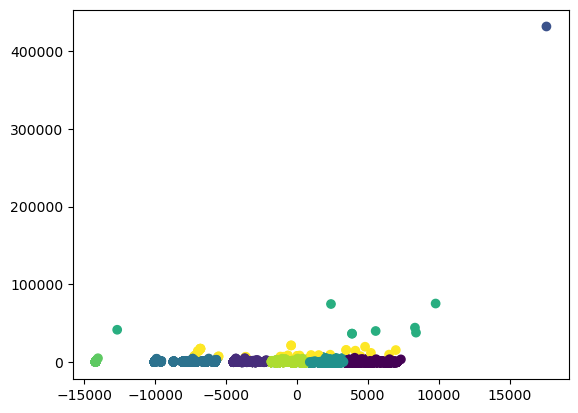

In [82]:
# plot individual clusters using PCA
# print also the sizes of clusters
from sklearn.decomposition import PCA

# YOUR CODE HERE
pca = PCA(2)
transformed_data = pca.fit_transform(X)
x = [item[0] for item in transformed_data]
y = [item[1] for item in transformed_data]
plt.scatter(x,y, c=predictions)

<Axes: xlabel='PC1', ylabel='PC2'>

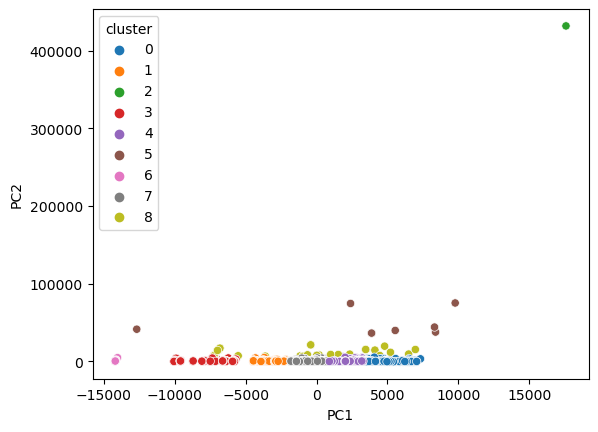

In [83]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pca.fit(X)

pca_data = pd.DataFrame(pca.fit_transform(X),columns=['PC1','PC2']) 
pca_data['cluster'] = pd.Categorical(km.labels_)

sns.scatterplot(x="PC1",y="PC2",hue="cluster",data=pca_data)

Evidently, an outlier has a bad influence. Let us remove it! Is it the haus with `YearBuilt ==

In [84]:
print(X[predictions==1])

       Rooms  Bedroom2  Bathroom  YearBuilt  Car  Lattitude  Longtitude  \
787        2       2.0       1.0     1970.0  2.0  -37.93050   145.05470   
788        3       3.0       1.0     1970.0  2.0  -37.92610   145.05660   
789        2       2.0       2.0     2008.0  1.0  -37.92370   145.07630   
790        2       2.0       1.0     2002.0  2.0  -37.92550   145.07960   
791        1       1.0       1.0     1970.0  1.0  -37.91810   145.05860   
...      ...       ...       ...        ...  ...        ...         ...   
13468      5       5.0       2.0     2006.0  2.0  -37.80795   145.01474   
13469      4       4.0       3.0     1970.0  2.0  -37.80828   145.06027   
13470      3       3.0       2.0     1970.0  4.0  -37.80359   145.06002   
13509      2       2.0       2.0     1910.0  1.0  -37.76623   144.99318   
13556      3       3.0       1.0     2003.0  1.0  -37.86744   144.65609   

       Distance  Postcode  BuildingArea  Propertycount  Landsize  
787        13.9    3165.0       

In [85]:
data2 = data.drop(11020)
print(f"{data.shape=} {data2.shape=}")

data.shape=(13580, 21) data2.shape=(13579, 21)


(array([4898., 1402., 3841., 3438.]),
 array([0.  , 0.75, 1.5 , 2.25, 3.  ]),
 <BarContainer object of 4 artists>)

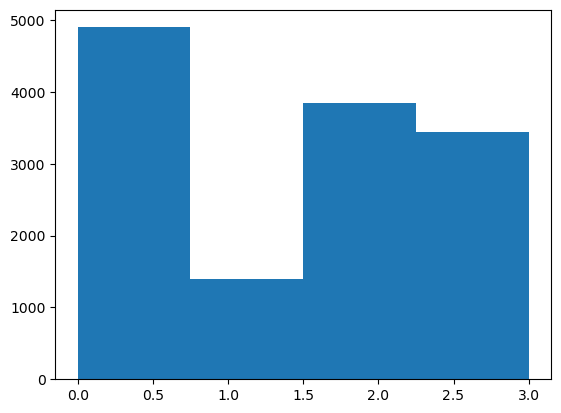

In [86]:
X = data2[['Rooms', 'Bedroom2', 'Bathroom', 'YearBuilt', 'Car', 'Lattitude', 'Longtitude', 
              'Distance', 'Postcode', 'BuildingArea', 'Propertycount', 'Landsize']]
y = data2['Price']

n_clusters = 4
km = KMeans(n_clusters=n_clusters, n_init=10)


km.fit(X)
y_pred = km.predict(X)
plt.hist(y_pred, bins=n_clusters)


In [87]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X2D = pca.fit_transform(X)

# YOUR CODE HERE
raise NotImplementedError()


NotImplementedError: 

## 3. How can we visualize the result of clustering?
### Using geographical coordinates
* plot clusters according to the geographical coordinates

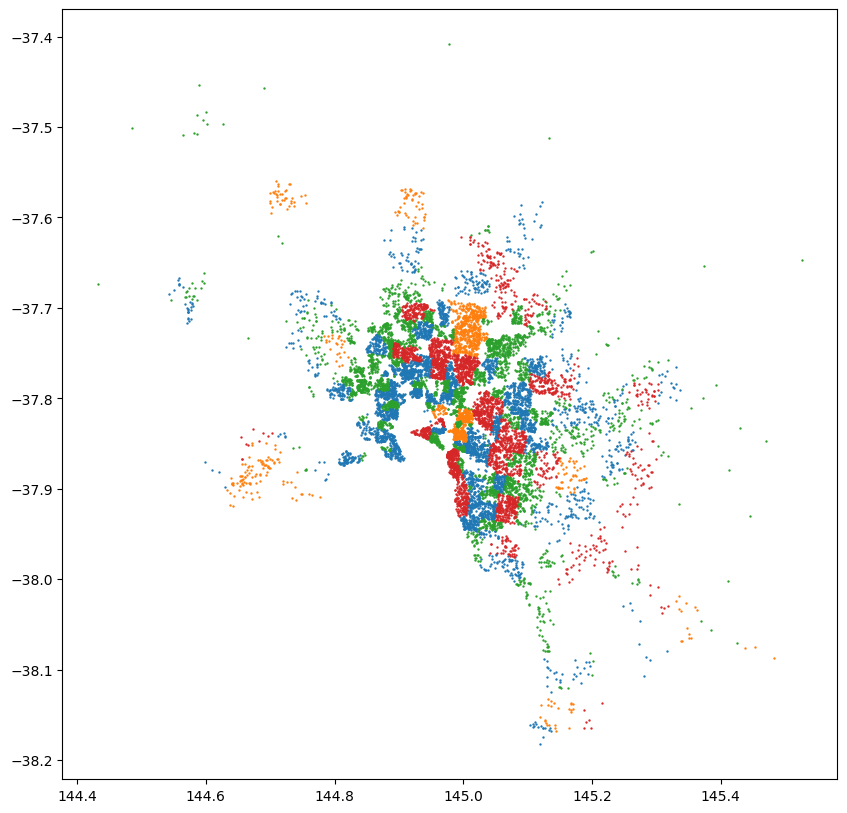

In [89]:
plt.figure(figsize=(10,10))

for b in range(n_clusters):
    current_cluster = data2[y_pred == b]
    plt.scatter(current_cluster['Longtitude'],current_cluster['Lattitude'],  s=0.5)

In [93]:
print(data.shape)
print(data[data.Address == '389 Gore St'])

plt.figure(figsize=(10,10))
# YOUR CODE HERE
entry = data.loc[data["Address"] == '389 Gore St']


(13580, 21)
        Suburb      Address  Rooms Type      Price Method SellerG        Date  \
11020  Fitzroy  389 Gore St      3    h  2700000.0     VB     Kay  12/08/2017   

       Distance  Postcode  ...  Bathroom  Car  Landsize  BuildingArea  \
11020       2.1    3065.0  ...       3.0  1.0  433014.0         126.0   

       YearBuilt  CouncilArea Lattitude  Longtitude             Regionname  \
11020     1970.0        Yarra -37.79751   144.98309  Northern Metropolitan   

      Propertycount  
11020        5825.0  

[1 rows x 21 columns]
        Suburb      Address  Rooms Type      Price Method SellerG        Date  \
11020  Fitzroy  389 Gore St      3    h  2700000.0     VB     Kay  12/08/2017   

       Distance  Postcode  ...  Bathroom  Car  Landsize  BuildingArea  \
11020       2.1    3065.0  ...       3.0  1.0  433014.0         126.0   

       YearBuilt  CouncilArea Lattitude  Longtitude             Regionname  \
11020     1970.0        Yarra -37.79751   144.98309  Northern Metr

<Figure size 1000x1000 with 0 Axes>

4. Can normalization help to obtain better clustering?

Silhouette score (complete)(n=2): 0.9046482386154672
Silhouette score (complete)(n=3): 0.9014112813530358
Silhouette score (complete)(n=4): 0.8758155024787755
Silhouette score (complete)(n=5): 0.7331650061759895
Silhouette score (complete)(n=6): 0.6039737599512363
Silhouette score (ward)(n=2): 0.5480911465961266
Silhouette score (ward)(n=3): 0.545943585167218
Silhouette score (ward)(n=4): 0.5512424702624874
Silhouette score (ward)(n=5): 0.516774511869143
Silhouette score (ward)(n=6): 0.5310342585607869
Silhouette score (single)(n=2): 0.9218265322775471
Silhouette score (single)(n=3): 0.9220934944362812
Silhouette score (single)(n=4): 0.8859546746700583
Silhouette score (single)(n=5): 0.8724287343676806
Silhouette score (single)(n=6): 0.8723109320637291
Silhouette score (average)(n=2): 0.9046482386154672
Silhouette score (average)(n=3): 0.9014112813530358
Silhouette score (average)(n=4): 0.8758155024787755
Silhouette score (average)(n=5): 0.8724287343676806
Silhouette score (average)(n=

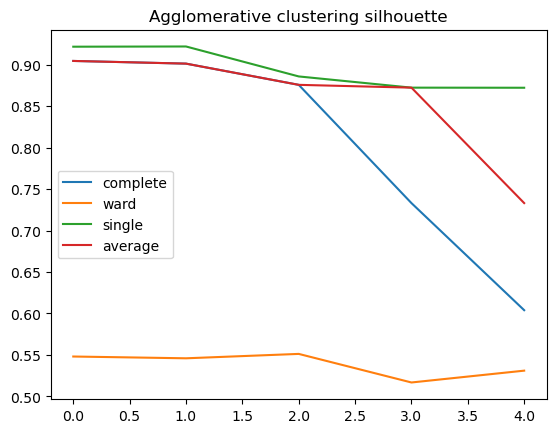

In [94]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
import sklearn.metrics

def plot_clusters(linkage, n):
    model = AgglomerativeClustering(n_clusters=n, compute_distances=True, linkage=linkage)
    classes = model.fit_predict(X)

    sil = sklearn.metrics.silhouette_score(X, classes)
    print(f"Silhouette score ({linkage})(n={n}): {sil}")

    return sil

def experiment(linkage):
    sils = []
    for n in [2, 3, 4, 5, 6]:
        sils.append(plot_clusters(linkage, n))
    return sils

#compute silhouette scores
sils_comp = experiment("complete")
sils_ward = experiment("ward")
sils_sing = experiment("single")
sils_aver = experiment("average")

#plot results
plt.plot(sils_comp, label="complete")
plt.plot(sils_ward, label="ward")
plt.plot(sils_sing, label="single")
plt.plot(sils_aver, label="average")
plt.title(f"Agglomerative clustering silhouette")
plt.legend()
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=65fcb34a-c427-4024-8ada-ed800cd6c50c' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>